# Analiza podatkov

V tej datoteki bom analizirala podatke, pridobljene s spletne strani myanimelist.net.

Ne pozabi spisati markdown blokov in README.md datoteke :)

In [1]:
import pandas as pd

pd.set_option("display.max_rows", 10)

%matplotlib inline 

ANIME = pd.read_csv("anime.csv", index_col="id") 
VSI_ANIME = pd.read_csv("vsi_anime.csv", index_col="id")
LIKI = pd.read_csv("liki.csv", index_col="id_lika")

In [2]:
VSI_ANIME

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
3579,Getter Robo,51,spring,1974,Manga,25,6.70,8804,Shounen,['Mecha'],"['Action', 'Sci-Fi']",['Toei Animation']
6383,Chargeman Ken!,65,spring,1974,Original,6,4.56,4518,NG,[],"['Action', 'Adventure', 'Sci-Fi']",['Knack Productions']
3388,Majokko Megu-chan,72,spring,1974,Original,25,6.67,4010,NG,['Mahou Shoujo'],[],['Toei Animation']
2836,Chiisana Viking Vickie,78,spring,1974,Novel,24,6.67,3948,Kids,['Historical'],"['Adventure', 'Comedy']",['Nippon Animation']
8139,Shin Minashigo Hutch,26,spring,1974,NaN,24,6.27,1542,NG,[],"['Adventure', 'Comedy', 'Drama']",['Tatsunoko Production']
...,...,...,...,...,...,...,...,...,...,...,...,...
59505,Kankin Kuiki Level X,NG,fall,2024,Web manga,NG,NaN,272,NG,[],"['Horror', 'Mystery']",[]
59499,Asatir 2: Mirai no Mukashi Banashi,NG,fall,2024,Original,NG,NaN,191,NG,[],['Adventure'],[]
58827,Okaimono Panda!,NG,fall,2024,Other,NG,NaN,117,NG,['Anthropomorphic'],[],['Shin-Ei Animation']


Splošno

In [ ]:
# Nekrižane: Ocene po številih zaokroženih, ocene po letih, najboljših nekaj
# Ocene po izvornem, demografika, žanri, najpopularnejše teme, studii, popularnost križana s characterji, demo, žanri. Franšize.
# Kakšni cross-reference-i npr. demografika-žanri-nekaj. Pač nekaj drugega med sabo kot le ocena. Število epizod v franšizi ... (sam zato nimam dost podatkov ...)

In [3]:
print(float(VSI_ANIME["ocena"].mean())) #Kako se neupoštevajo NaN?

6.854301446771755


In [4]:
filter_nan = VSI_ANIME["ocena"].notna()
ocene = VSI_ANIME[filter_nan]
print(sum(filter_nan))
ocene

4631


,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
3579,Getter Robo,51,spring,1974,Manga,25,6.70,8804,Shounen,['Mecha'],"['Action', 'Sci-Fi']",['Toei Animation']
6383,Chargeman Ken!,65,spring,1974,Original,6,4.56,4518,NG,[],"['Action', 'Adventure', 'Sci-Fi']",['Knack Productions']
3388,Majokko Megu-chan,72,spring,1974,Original,25,6.67,4010,NG,['Mahou Shoujo'],[],['Toei Animation']
2836,Chiisana Viking Vickie,78,spring,1974,Novel,24,6.67,3948,Kids,['Historical'],"['Adventure', 'Comedy']",['Nippon Animation']
8139,Shin Minashigo Hutch,26,spring,1974,NaN,24,6.27,1542,NG,[],"['Adventure', 'Comedy', 'Drama']",['Tatsunoko Production']
...,...,...,...,...,...,...,...,...,...,...,...,...
56189,Grendizer U,NG,summer,2024,Manga,NG,6.05,6030,NG,['Mecha'],"['Action', 'Sci-Fi']",['Gaina']
54730,Kinnikuman: Kanpeki Chоujin Shiso-hen,11,summer,2024,Manga,23,6.59,5896,Shounen,['Combat Sports'],"['Comedy', 'Sports']",['Production I.G']
59010,Yami Shibai 13,NG,summer,2024,Original,NG,5.97,2335,NG,[],"['Avant Garde', 'Horror', 'Supernatural']",['ILCA']


In [5]:
def zaokrozi(x):
    return round(x, 1)

zaokrozena_ocena = ocene["ocena"].apply(zaokrozi)  #Bolj elegantna rešitev?
zaokrozena_ocena

id
3579     6.7
6383     4.6
3388     6.7
2836     6.7
8139     6.3
        ... 
56189    6.0
54730    6.6
59010    6.0
54143    6.6
58926    6.0
Name: ocena, Length: 4631, dtype: float64

In [6]:
podtabela = ocene[["naslov", "leto premiere", "ocena"]].copy()
podtabela["zaokrožena ocena"] = zaokrozena_ocena
podtabela

,naslov,leto premiere,ocena,zaokrožena ocena
id,,,,
3579,Getter Robo,1974,6.70,6.7
6383,Chargeman Ken!,1974,4.56,4.6
3388,Majokko Megu-chan,1974,6.67,6.7
2836,Chiisana Viking Vickie,1974,6.67,6.7
8139,Shin Minashigo Hutch,1974,6.27,6.3
...,...,...,...,...
56189,Grendizer U,2024,6.05,6.0
54730,Kinnikuman: Kanpeki Chоujin Shiso-hen,2024,6.59,6.6
59010,Yami Shibai 13,2024,5.97,6.0


In [7]:
po_ocenah = podtabela.groupby("zaokrožena ocena").size()
po_ocenah

zaokrožena ocena
2.9     1
3.0     1
3.3     4
3.8     3
3.9     2
       ..
8.8    15
8.9     7
9.0     7
9.1     4
9.3     1
Length: 56, dtype: int64

<Axes: title={'center': 'Razporeditev zaokroženih ocen'}, xlabel='zaokrožena ocena', ylabel='število animejev'>

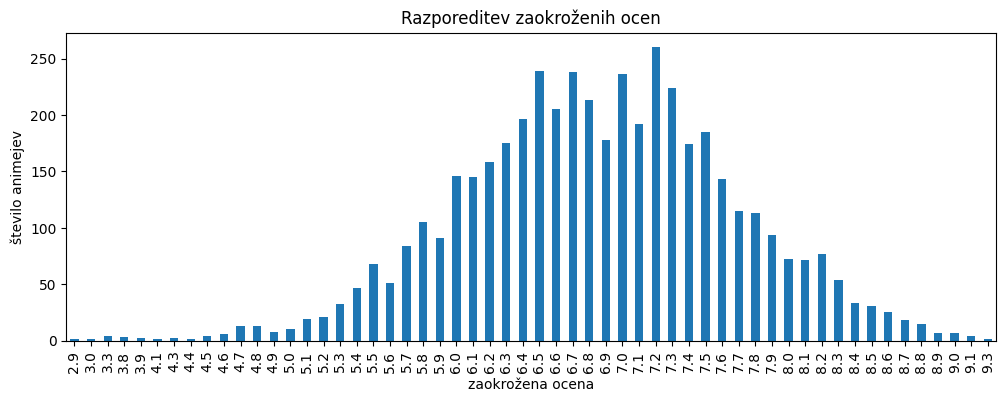

In [13]:
po_ocenah.plot.bar(title="Razporeditev zaokroženih ocen", xlabel= "zaokrožena ocena", ylabel="število animejev", figsize=(12, 4)) #Dam na manj? Na koliko manj?  Ali lahko razširim graf?

<Axes: xlabel='leto premiere'>

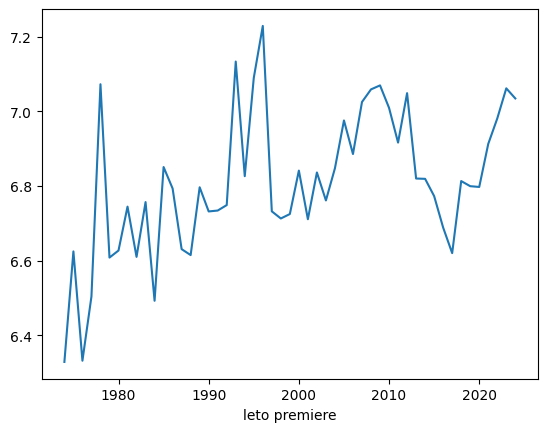

In [14]:
ocene_po_letih = ocene.groupby("leto premiere")["ocena"].mean()
ocene_po_letih.plot()

To je precej zanimivo, razišči še kaj v to smer? Število sploh animejev, memberjev, kaj so takrat dajal ven (demo, teme ...?)

In [ ]:
# Naredi tisti trojni za desetletja/petletja mogoče. Da je število animejev (pobarvano po demografiki), povprečna ocena, memberji, 

<Axes: xlabel='petletja'>

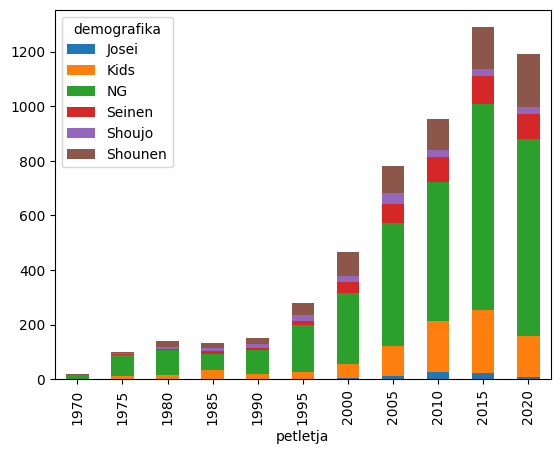

In [34]:
podtabela_po_letih = VSI_ANIME[["naslov", "leto premiere", "ocena", "demografika", "člani", "vir"]].copy()

def petletje(x):
    if x % 10 >= 5:
        return (x // 10) * 10 + 5
    return (x // 10) * 10

podtabela_po_letih["petletja"] = podtabela_po_letih["leto premiere"].apply(petletje)

petletni_podatki = pd.crosstab(
    index = podtabela_po_letih["petletja"],
    columns = podtabela_po_letih["demografika"]
)
petletni_podatki.plot(kind = "bar", stacked = True)

A mi to karkoli pove, glede na to kako veliko je NG stvari? Morda z žanri naredim nekaj podobnega?
Mogla bi se vprašati, kaj bi sploh rada ugotovila.

<Axes: xlabel='demografika'>

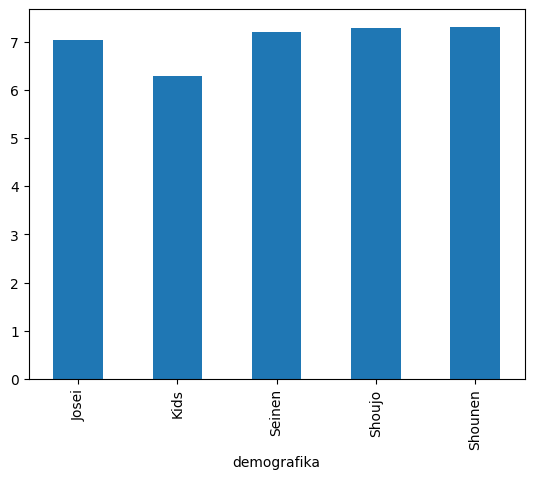

In [35]:
# Povprečna ocena po demografiki
filter_demo = podtabela_po_letih["demografika"] != "NG"
podtabela_demo = podtabela_po_letih[filter_demo]

podtabela_demo.groupby("demografika")["ocena"].mean().plot.bar()

# Zanimivo, da ni razlike v resnici.

<Axes: xlabel='petletja'>

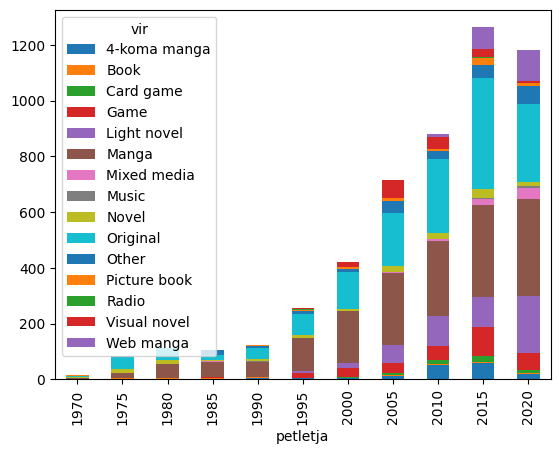

In [41]:
# Kaj pa enake stvari po virih?

petletni_podatki_viri = pd.crosstab(
    index = podtabela_po_letih["petletja"],
    columns = podtabela_po_letih["vir"]
)
petletni_podatki_viri.plot(kind = "bar", stacked = True)

In [44]:
podtabela_po_letih.groupby("vir").size().sort_values()

vir
Radio              5
Music             16
Book              36
Card game         49
Picture book      71
                ... 
Other            235
Game             311
Light novel      512
Original        1490
Manga           1689
Length: 15, dtype: int64

<Axes: xlabel='vir'>

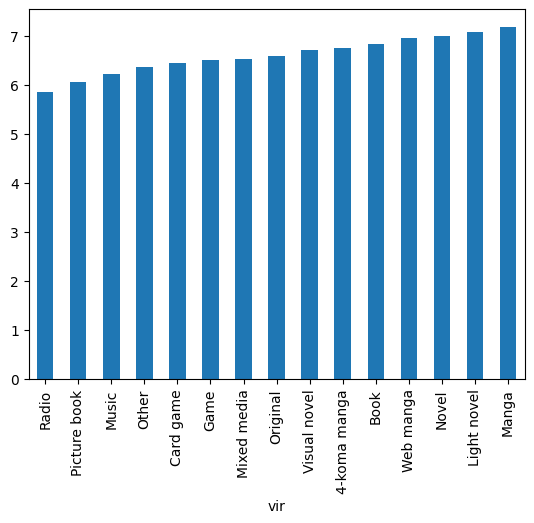

In [43]:
podtabela_po_letih.groupby("vir")["ocena"].mean().sort_values().plot.bar()

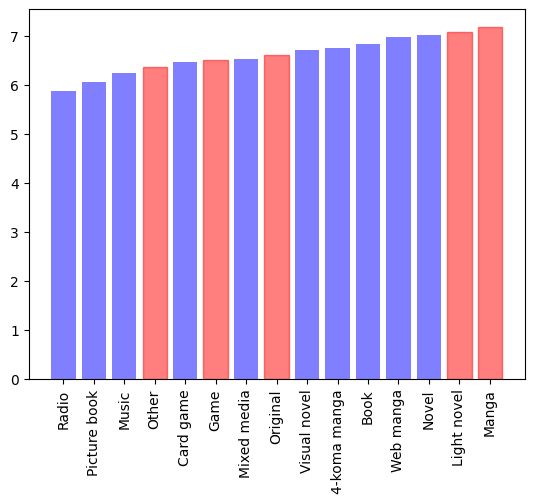

In [80]:
df_viri = pd.DataFrame(podtabela_po_letih["vir"])

df_viri2 = pd.DataFrame({"stevilo": podtabela_po_letih.groupby("vir")["ocena"].mean().sort_values()})

import matplotlib.pyplot as plt

def plot_color_label(data, target):
    bars = plt.bar(x=data.index, height=data.stevilo, color='blue', alpha=0.5)
    for idx, word in enumerate(data.index):
        if word in target:
            bars[idx].set_color(c='red')
    plt.xticks(rotation = 90)

popularni_viri = ["Manga", "Original", "Light novel", "Game", "Other"]

plot_color_label(df_viri2, popularni_viri)

In [15]:
najboljsi = ocene.sort_values("ocena", ascending=False)
najboljsi.head(10)

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
52991,Sousou no Frieren,28,fall,2023,Manga,24,9.34,817774,Shounen,[],"['Adventure', 'Drama', 'Fantasy']",['Madhouse']
5114,Fullmetal Alchemist: Brotherhood,64,spring,2009,Manga,24,9.09,3381374,Shounen,['Military'],"['Action', 'Adventure', 'Drama', 'Fantasy']",['Bones']
9253,Steins;Gate,24,spring,2011,Visual novel,24,9.07,2590030,NG,"['Psychological', 'Time Travel']","['Drama', 'Sci-Fi', 'Suspense']",['White Fox']
28977,Gintama°,51,spring,2015,Manga,24,9.06,638181,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Bandai Namco Pictures']
38524,Shingeki no Kyojin Season 3 Part 2,10,spring,2019,Manga,23,9.05,2312316,Shounen,"['Gore', 'Military', 'Survival']","['Action', 'Drama', 'Suspense']",['Wit Studio']
9969,Gintama&#039;,51,spring,2011,Manga,24,9.03,562830,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Sunrise']
11061,Hunter x Hunter (2011),148,fall,2011,Manga,23,9.03,2872330,Shounen,[],"['Action', 'Adventure', 'Fantasy']",['Madhouse']
15417,Gintama&#039;: Enchousen,13,fall,2012,Manga,24,9.02,328844,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Sunrise']
41467,Bleach: Sennen Kessen-hen,13,fall,2022,Manga,24,9.01,558114,Shounen,[],"['Action', 'Adventure', 'Fantasy']",['Pierrot']
